In [1]:
from buildingmodel import data_path
from pathlib import Path
import seaborn as sns
import geopandas as gpd
from buildingmodel.main import Parameters, run_all
import os
from shapely.geometry import Polygon
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
parameters = Parameters(
    districts="districts_test_sample_new.gpkg",
    census="district_level_census_test_sample.hdf",
    district_level_diagnosis="district_level_diagnosis_data_test_sample.hdf",
    date_format="%Y-%m-%d",
    gas_network_route="gas_network_route_sample.gpkg",
)

building_data = Path(data_path["gis"]) / "testing" / "test_sample.gpkg"
climate_data = Path(data_path["climate"]) / "Brest.epw"

In [16]:
buildings, boundaries, climate, dwellings = run_all(
    building_data, climate_data, parameters
)

/home/yassine/miniconda3/envs/buildingmodel_dev/lib/python3.8/site-packages/topojson/core/cut.py:112: ShapelyDeprecationWarning: STRtree will be changed in 2.0.0 and will not be compatible with versions < 2.
  tree_splitter = STRtree(mp)


In [4]:
buildings.head()

geometry   main_usage  \
0  POLYGON ((842329.700 6481862.000, 842318.300 6...  residential   
1  POLYGON ((842220.400 6481973.000, 842220.800 6...      unknown   
2  POLYGON ((842210.100 6481958.900, 842205.600 6...      unknown   
3  POLYGON ((842232.800 6481970.400, 842234.400 6...   industrial   
4  POLYGON ((842249.600 6481972.800, 842255.200 6...      unknown   

  secondary_usage construction_date  dwelling_count  floor_count  \
0             NaN        2008-01-01             5.0          2.0   
1             NaN              None             0.0          1.0   
2             NaN              None             0.0          1.0   
3             NaN              None             0.0          1.0   
4             NaN              None             0.0          1.0   

  wall_material roof_material  height  altitude_min  ...  \
0            05            01     5.0         243.0  ...   
1          None          None     4.0         232.8  ...   
2          None          None     4.0         232.1  ...   
3          None          None     3.0         233.4  ...   
4          None          None     6.0         233.9  ...   

   peak_final_consumption peak_final_consumption_by_surface  \
0                     0.0                               0.0   
1                     0.0                               0.0   
2                     0.0                               0.0   
3                     0.0                               0.0   
4                     0.0                               0.0   

   peak_primary_consumption  peak_primary_consumption_by_surface    volume  \
0                       0.0                                  0.0  1186.375   
1                       0.0                                  0.0   246.340   
2                       0.0                                  0.0   118.720   
3                       0.0                                  0.0   320.790   
4                       0.0                                  0.0   380.730   

   annual_ventilation_losses annual_thermal_losses annual_occupant_gains  \
0               16627.392189          43086.059349           9388.529795   
1                        NaN                   NaN                   NaN   
2                        NaN                   NaN                   NaN   
3                        NaN                   NaN                   NaN   
4                        NaN                   NaN                   NaN   

  conventional_thermal_losses  conventional_occupant_gains  
0                39146.190378                  5796.596234  
1                         NaN                          NaN  
2                         NaN                          NaN  
3                         NaN                          NaN  
4                         NaN                          NaN  

[5 rows x 158 columns]

In [5]:
buildings["wall_material"].value_counts()

wall_material
20    7
23    5
50    2
05    1
00    1
40    1
02    1
34    1
90    1
36    1
35    1
Name: count, dtype: int64

In [6]:
buildings.columns.tolist()

['geometry',
 'main_usage',
 'secondary_usage',
 'construction_date',
 'dwelling_count',
 'floor_count',
 'wall_material',
 'roof_material',
 'height',
 'altitude_min',
 'altitude_max',
 'name',
 'conventional_heating_set_point',
 'actual_heating_set_point',
 'altitude',
 'construction_year',
 'construction_year_class',
 'wall_class',
 'roof_class',
 'floor_area',
 'residential_type',
 'multi_dwelling',
 'residential_only',
 'has_annex',
 'district',
 'city',
 'city_group',
 'department',
 'region',
 'has_network_city_level',
 'has_network_grdf_data',
 'to_sim',
 'building_id',
 'exterior_wall_area',
 'adjacent_wall_area',
 'roof_area',
 'exterior_floor_area',
 'floor_area_share',
 'gas_network_distance',
 'gas_network_connection',
 'living_area',
 'living_area_share',
 'heating_system',
 'air_change_rate',
 'main_heating_system_efficiency',
 'main_heating_energy',
 'backup_heating_system_efficiency',
 'backup_heating_energy',
 'backup_heating_share',
 'dhw_energy',
 'wall_u_value',
 '

In [7]:
buildings["need_by_surface"] = (
    buildings["annual_heating_needs"] / buildings["living_area"]
)
buildings["peak_by_surface"] = (
    buildings["peak_heating_needs"] / buildings["living_area"]
)

In [8]:
buildings.dropna(subset="need_by_surface")["need_by_surface"]

0      33.541984
7      54.024548
8      56.220984
9      35.412665
10     42.090895
11     69.174999
12     36.601221
13     37.912058
14    100.496767
15     41.197269
17     37.696968
18     42.286203
19     58.714850
20     44.604127
21     51.112449
22    110.827618
23     43.907727
24     43.612361
25     67.951703
26     41.268580
27     34.874124
28    143.539946
Name: need_by_surface, dtype: float64

In [9]:
sns.histplot(buildings, x="need_by_surface")

<Axes: xlabel='need_by_surface', ylabel='Count'>

<Axes: xlabel='peak_by_surface', ylabel='Count'>

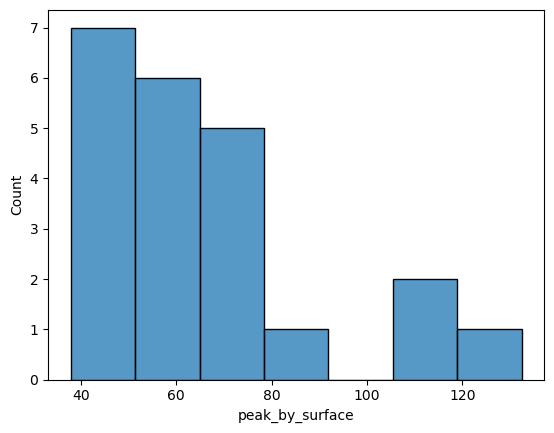

In [10]:
sns.histplot(buildings, x="peak_by_surface")

In [12]:
buildings.to_crs("EPSG:4326").explore(column="need_by_surface")